<a href="https://colab.research.google.com/github/vorobyevakatya/Comp-Linguistics/blob/main/%D0%92%D0%BE%D1%80%D0%BE%D0%B1%D1%8C%D0%B5%D0%B2%D0%B0_vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Bag-of-Words

In [13]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 59.2 MB/s eta 0:00:00


In [ ]:
import gensim
import gensim.downloader as api
from gensim import corpora
from gensim.models import TfidfModel
import numpy as np
from pprint import pprint

In [ ]:
# Данные для примера
documents = [
    "кошка сидит на ковре",
    "собака бегает по двору",
    "кошка играет с собакой",
    "птица летит высоко в небе",
    "собака и кошка дружат"
]

print("Исходные документы:")
for i, doc in enumerate(documents, 1):
    print(f"{i}. {doc}")

Исходные документы:
1. кошка сидит на ковре
2. собака бегает по двору
3. кошка играет с собакой
4. птица летит высоко в небе
5. собака и кошка дружат


In [ ]:
# Токенизация
tokenized_docs = [doc.lower().split() for doc in documents]
print("Токенизированные документы:")
pprint(tokenized_docs)

Токенизированные документы:
[['кошка', 'сидит', 'на', 'ковре'],
 ['собака', 'бегает', 'по', 'двору'],
 ['кошка', 'играет', 'с', 'собакой'],
 ['птица', 'летит', 'высоко', 'в', 'небе'],
 ['собака', 'и', 'кошка', 'дружат']]


In [ ]:
# Создание словаря
dictionary = corpora.Dictionary(tokenized_docs)
print(f"Словарь: {dictionary.token2id}")

Словарь: {'ковре': 0, 'кошка': 1, 'на': 2, 'сидит': 3, 'бегает': 4, 'двору': 5, 'по': 6, 'собака': 7, 'играет': 8, 'с': 9, 'собакой': 10, 'в': 11, 'высоко': 12, 'летит': 13, 'небе': 14, 'птица': 15, 'дружат': 16, 'и': 17}


In [ ]:
dictionary.token2id

{'ковре': 0,
 'кошка': 1,
 'на': 2,
 'сидит': 3,
 'бегает': 4,
 'двору': 5,
 'по': 6,
 'собака': 7,
 'играет': 8,
 'с': 9,
 'собакой': 10,
 'в': 11,
 'высоко': 12,
 'летит': 13,
 'небе': 14,
 'птица': 15,
 'дружат': 16,
 'и': 17}

In [21]:
# Создание Bag-of-Words представления
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]
print("Bag-of-Words векторы (индекс_слова: частота):")
for i, doc_vec in enumerate(bow_corpus, 1):
    print(f"Документ {i}: {doc_vec}")

NameError: name 'tokenized_docs' is not defined

```
[['кошка', 'сидит', 'на', 'ковре'],
 ['собака', 'бегает', 'по', 'двору'],
 ['кошка', 'играет', 'с', 'собакой'],
 ['птица', 'летит', 'высоко', 'в', 'небе'],
 ['собака', 'и', 'кошка', 'дружат']]
 ```

```
Словарь: {'ковре': 0, 'кошка': 1, 'на': 2, 'сидит': 3, 'бегает': 4, 'двору': 5, 'по': 6, 'собака': 7, 'играет': 8, 'с': 9, 'собакой': 10, 'в': 11, 'высоко': 12, 'летит': 13, 'небе': 14, 'птица': 15, 'дружат': 16, 'и': 17}
```

In [ ]:
# Преобразование в плотные векторы для визуализации
def bow_to_dense(bow_corpus, dictionary):
    dense_vectors = []
    for doc in bow_corpus:
        dense_vec = [0] * len(dictionary)
        for idx, freq in doc:
            dense_vec[idx] = freq
        dense_vectors.append(dense_vec)
    return dense_vectors

dense_vectors = bow_to_dense(bow_corpus, dictionary)
print("Плотные векторы Bag-of-Words:")
print("Слова:", list(dictionary.token2id.keys()))
for i, vec in enumerate(dense_vectors, 1):
    print(f"Док {i}: {vec}")

Плотные векторы Bag-of-Words:
Слова: ['ковре', 'кошка', 'на', 'сидит', 'бегает', 'двору', 'по', 'собака', 'играет', 'с', 'собакой', 'в', 'высоко', 'летит', 'небе', 'птица', 'дружат', 'и']
Док 1: [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Док 2: [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Док 3: [0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]
Док 4: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0]
Док 5: [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]


```
Документ 1: [(0, 1), (1, 1), (2, 1), (3, 1)]
Документ 2: [(4, 1), (5, 1), (6, 1), (7, 1)]
Документ 3: [(1, 1), (8, 1), (9, 1), (10, 1)]
Документ 4: [(11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]
Документ 5: [(1, 1), (7, 1), (16, 1), (17, 1)]
```

Matrix shape: (5, 18)


Text(0.5, 36.72222222222221, 'Words')

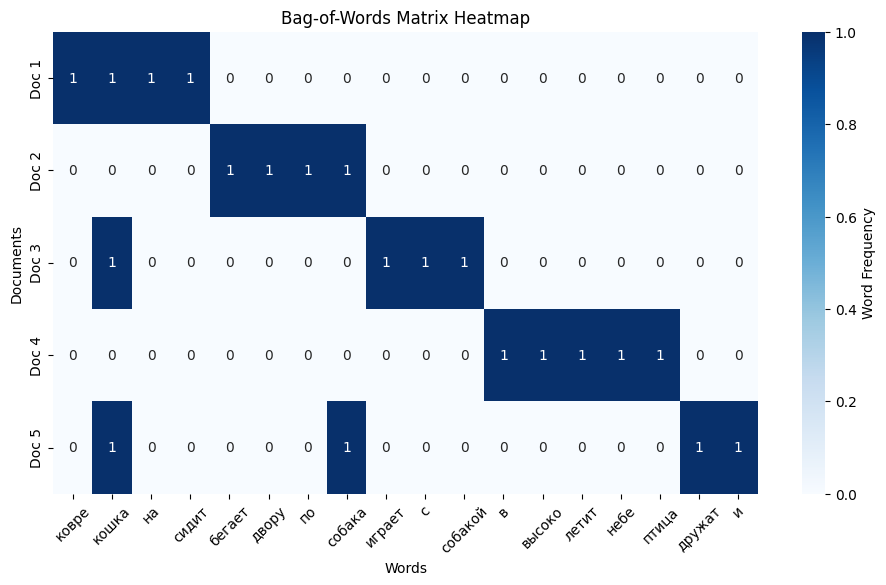

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация
matrix = np.array(dense_vectors)
words = list(dictionary.token2id.keys())
doc_names = [f"Doc {i+1}" for i in range(len(documents))]

print(f"Matrix shape: {matrix.shape}")

plt.figure(figsize=(25, 6))

plt.subplot(1, 2, 1)
sns.heatmap(matrix,
            annot=True,
            fmt='d',
            xticklabels=words,
            yticklabels=doc_names,
            cmap='Blues',
            cbar_kws={'label': 'Word Frequency'})
plt.title('Bag-of-Words Matrix Heatmap')
plt.xticks(rotation=45)
plt.ylabel('Documents')
plt.xlabel('Words')


### TF-IDF

In [20]:
tfidf_model = TfidfModel(bow_corpus)
tfidf_corpus = tfidf_model[bow_corpus]

print("TF-IDF векторы (индекс_слова: tfidf_вес):")
for i, doc_vec in enumerate(tfidf_corpus, 1):
    print(f"Документ {i}: {[(dictionary[idx], round(score, 3)) for idx, score in doc_vec]}")

NameError: name 'bow_corpus' is not defined

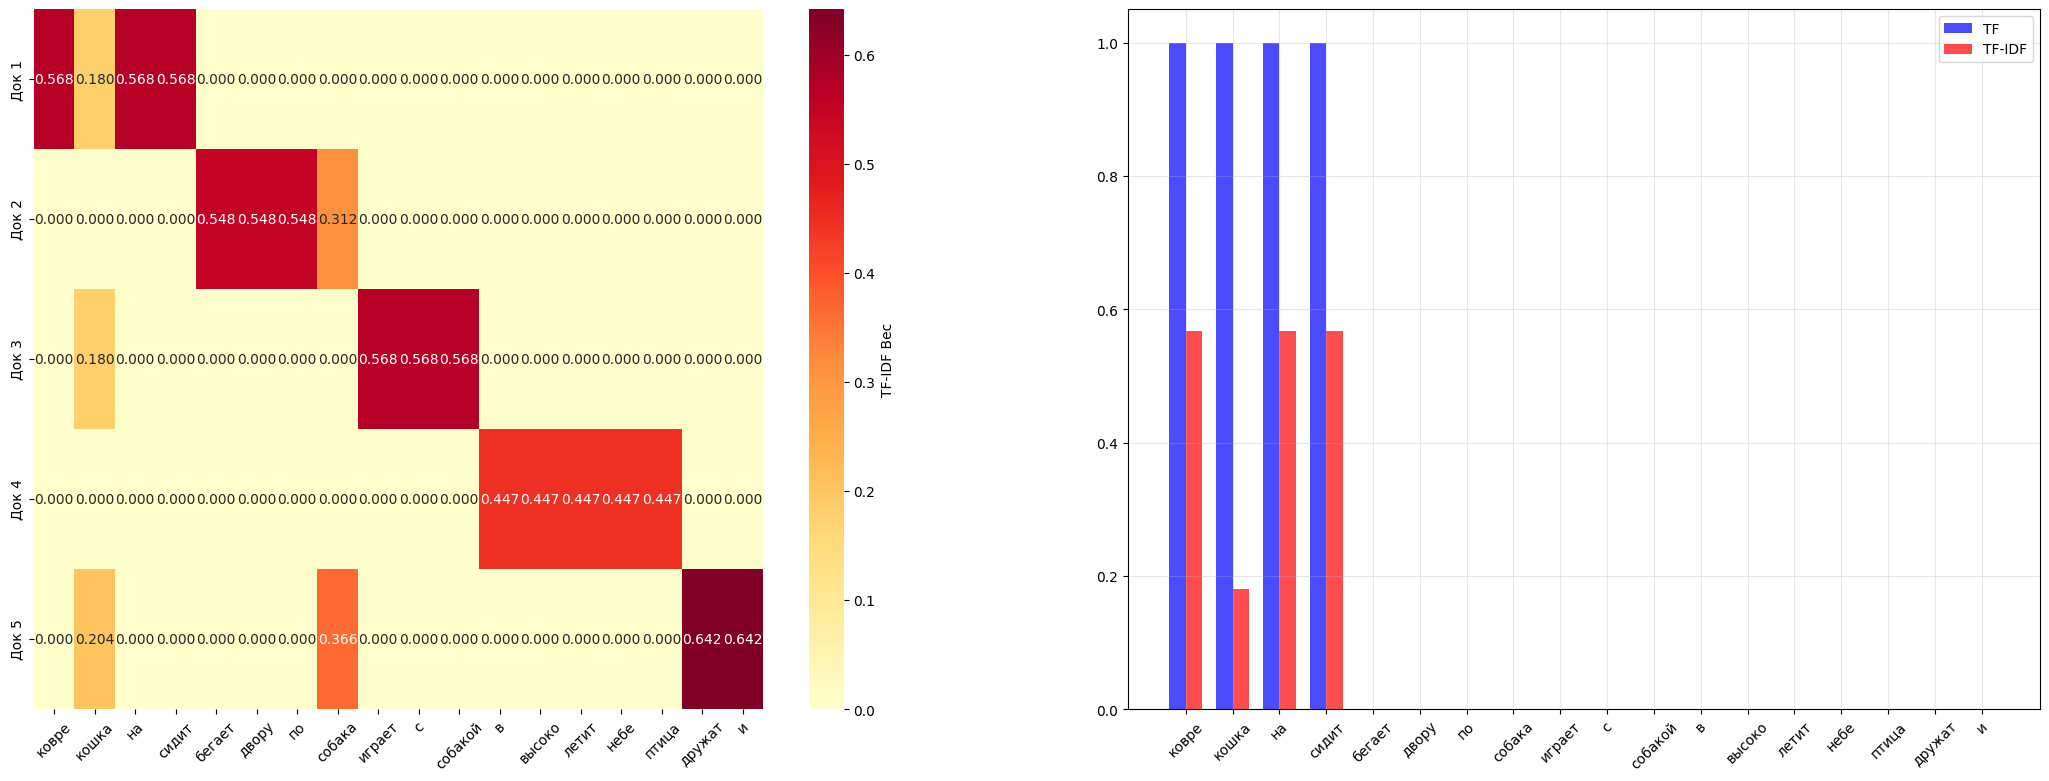

In [ ]:
# Преобразуем TF-IDF в плотную матрицу для визуализации
def tfidf_to_dense(tfidf_corpus, dictionary):
    dense_vectors = []
    for doc in tfidf_corpus:
        dense_vec = [0.0] * len(dictionary)
        for idx, score in doc:
            dense_vec[idx] = score
        dense_vectors.append(dense_vec)
    return dense_vectors

tfidf_dense = tfidf_to_dense(tfidf_corpus, dictionary)
tfidf_matrix = np.array(tfidf_dense)
words = list(dictionary.token2id.keys())
doc_names = [f"Док {i+1}" for i in range(len(tfidf_corpus))]

plt.figure(figsize=(40, 20))

plt.subplot(2, 3, 1)
sns.heatmap(tfidf_matrix,
            annot=True,
            fmt='.3f',
            xticklabels=words,
            yticklabels=doc_names,
            cmap='YlOrRd',
            cbar_kws={'label': 'TF-IDF Вес'})
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
# Получаем исходные TF значения из bow_corpus
tf_dense = bow_to_dense(bow_corpus, dictionary)
tf_matrix = np.array(tf_dense)

# Сравниваем TF и TF-IDF для первого документа
doc_idx = 0
x_pos = np.arange(len(words))
width = 0.35

plt.bar(x_pos - width/2, tf_matrix[doc_idx], width, label='TF', alpha=0.7, color='blue')
plt.bar(x_pos + width/2, tfidf_matrix[doc_idx], width, label='TF-IDF', alpha=0.7, color='red')
plt.xticks(x_pos, words, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

#### **1. TF (Term Frequency) - Частота термина**
```python
TF(t,d) = count(t,d) / total_terms(d)
```
или упрощенно:
```python
TF(t,d) = count(t,d)  # просто количество вхождений
```

#### **2. IDF (Inverse Document Frequency) - Обратная частота документа**
```python
IDF(t) = log( N / (DF(t) + 1) ) + 1
```
Где:
- **N** - общее количество документов
- **DF(t)** - количество документов, содержащих слово t
- **+1** в знаменателе - сглаживание, чтобы не было "околонулевых" значений (smoothing)
- **+1** в конце - для избежания нулевых весов

#### **3. TF-IDF - итоговый вес**
```python
TF-IDF(t,d) = TF(t,d) × IDF(t)
```

**Сравнение разных формул IDF**

| Формула | Редкое слово (DF=1) | Частое слово (DF=100) | Сверхчастое (DF=990) |
|---------|---------------------|----------------------|---------------------|
| `log(N/DF)` | 6.91 | 2.30 | 0.01 |
| `log(N/(DF+1))` | 6.90 | 2.29 | 0.009 |
| `log(N/(DF+1)) + 1` | **7.90** | **3.29** | **1.009** |


### Word2Vec

In [ ]:
# Используем небольшую модель для демонстрации
print("Загрузка предобученной модели Word2Vec...")
w2v_model = api.load("glove-wiki-gigaword-50")  # Маленькая модель

# Функция для получения эмбеддинга документа
def get_doc_embedding(tokens, model):
    word_vectors = []
    for token in tokens:
        try:
            word_vectors.append(model[token])
        except KeyError:
            continue
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Получаем эмбеддинги для документов
doc_embeddings = []
for i, tokens in enumerate(tokenized_docs):
    embedding = get_doc_embedding(tokens, w2v_model)
    doc_embeddings.append(embedding)
    print(f"\nДокумент {i+1}: {documents[i]}")
    print(f"Эмбеддинг (первые 10 значений): {embedding[:10].round(4)}")
    print(f"Размер: {embedding.shape}")

# Косинусная схожесть между документами
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(doc_embeddings)
print("\nМатрица косинусной схожести:")
print("     Д1    Д2    Д3    Д4    Д5")
for i, row in enumerate(similarity_matrix):
    print(f"Д{i+1}  " + "  ".join([f"{x:.3f}" for x in row]))

Загрузка предобученной модели Word2Vec...

Документ 1: кошка сидит на ковре
Эмбеддинг (первые 10 значений): [-1.3191  1.5595  0.0702 -0.4633 -0.8065  0.3126  1.2403 -0.6641 -1.1753
 -0.4418]
Размер: (50,)

Документ 2: собака бегает по двору
Эмбеддинг (первые 10 значений): [-1.1564  0.7363 -0.162  -0.0846 -0.9603  0.3709  1.9096  0.0091 -0.388
 -0.8261]
Размер: (50,)

Документ 3: кошка играет с собакой
Эмбеддинг (первые 10 значений): [-1.5624  0.9866  0.1836 -1.0273 -0.8551 -0.0476  1.141  -0.6877 -0.2825
 -0.7102]
Размер: (50,)

Документ 4: птица летит высоко в небе
Эмбеддинг (первые 10 значений): [-1.0499  1.3412 -0.3431 -0.8776 -1.2784  0.1292  1.812  -0.3816 -0.9911
 -0.2818]
Размер: (50,)

Документ 5: собака и кошка дружат
Эмбеддинг (первые 10 значений): [-0.9957  1.3808 -0.3036 -0.7568 -0.9025  0.2521  1.4351 -0.4907 -1.3925
 -0.1646]
Размер: (50,)

Матрица косинусной схожести:
     Д1    Д2    Д3    Д4    Д5
Д1  1.000  0.856  0.811  0.873  0.873
Д2  0.856  1.000  0.784  0.859  0.

*Как работает Word2Vec мы разберем на следующей лекции..*

### Домашка

1. Скачать [датасет по ссылке](https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv) (просто запустить строку ниже)

In [25]:
!wget https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv

--2025-11-03 13:14:59--  https://raw.githubusercontent.com/tyqiangz/multilingual-sentiment-datasets/refs/heads/main/data/english/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 102826 (100K) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>] 100.42K  --.-KB/s    in 0.009s  

2025-11-03 13:14:59 (10.9 MB/s) - ‘test.csv’ saved [102826/102826]



2. Открыть csv и сохранить текст в переменную (макс. балл == 1)

In [2]:
import pandas as pd

df = pd.read_csv('test.csv')

print(df.head())
print(df.columns)

texts = df['text'].tolist()
print(f"Всего текстов: {len(texts)}")
print("Пример:", texts[0])

                                                text     label         source
0  Trying to have a conversation with my dad abou...  negative  sem_eval_2017
1  #latestnews 4 #newmexico #politics + #nativeam...   neutral  sem_eval_2017
2  @user You are a stand up guy and a Gentleman V...  positive  sem_eval_2017
3  @user @user @user Looks like Flynn isn't too p...  negative  sem_eval_2017
4  perfect pussy clips #vanessa hudgens zac efron...   neutral  sem_eval_2017
Index(['text', 'label', 'source'], dtype='object')
Всего текстов: 870
Пример: Trying to have a conversation with my dad about vegetarianism is the most pointless infuriating thing ever #caveman 


3. Извлечь столбец с текстами (макс. балл == 1)

In [3]:
text_column = df['text']
print(text_column.head())

0    Trying to have a conversation with my dad abou...
1    #latestnews 4 #newmexico #politics + #nativeam...
2    @user You are a stand up guy and a Gentleman V...
3    @user @user @user Looks like Flynn isn't too p...
4    perfect pussy clips #vanessa hudgens zac efron...
Name: text, dtype: object


4. Построить Bag-of-Words (макс. балл == 3)

Предобработка текстов...
Построение словаря...
✓ Размер словаря: 4028 уникальных слов
✓ Общее количество слов: 12855
Создание BoW представления...
✓ Создано 870 BoW векторов
✓ Размерность каждого вектора: 4028

Топ-20 самых частых слов:
 1. user            -  570 раз
 2. the             -  387 раз
 3. to              -  268 раз
 4. a               -  227 раз
 5. of              -  199 раз
 6. is              -  186 раз
 7. for             -  176 раз
 8. in              -  165 раз
 9. and             -  164 раз
10. i               -  135 раз
11. on              -  118 раз
12. you             -   92 раз
13. this            -   80 раз
14. it              -   79 раз
15. that            -   79 раз
16. with            -   71 раз
17. are             -   65 раз
18. trump           -   62 раз
19. be              -   60 раз
20. not             -   59 раз


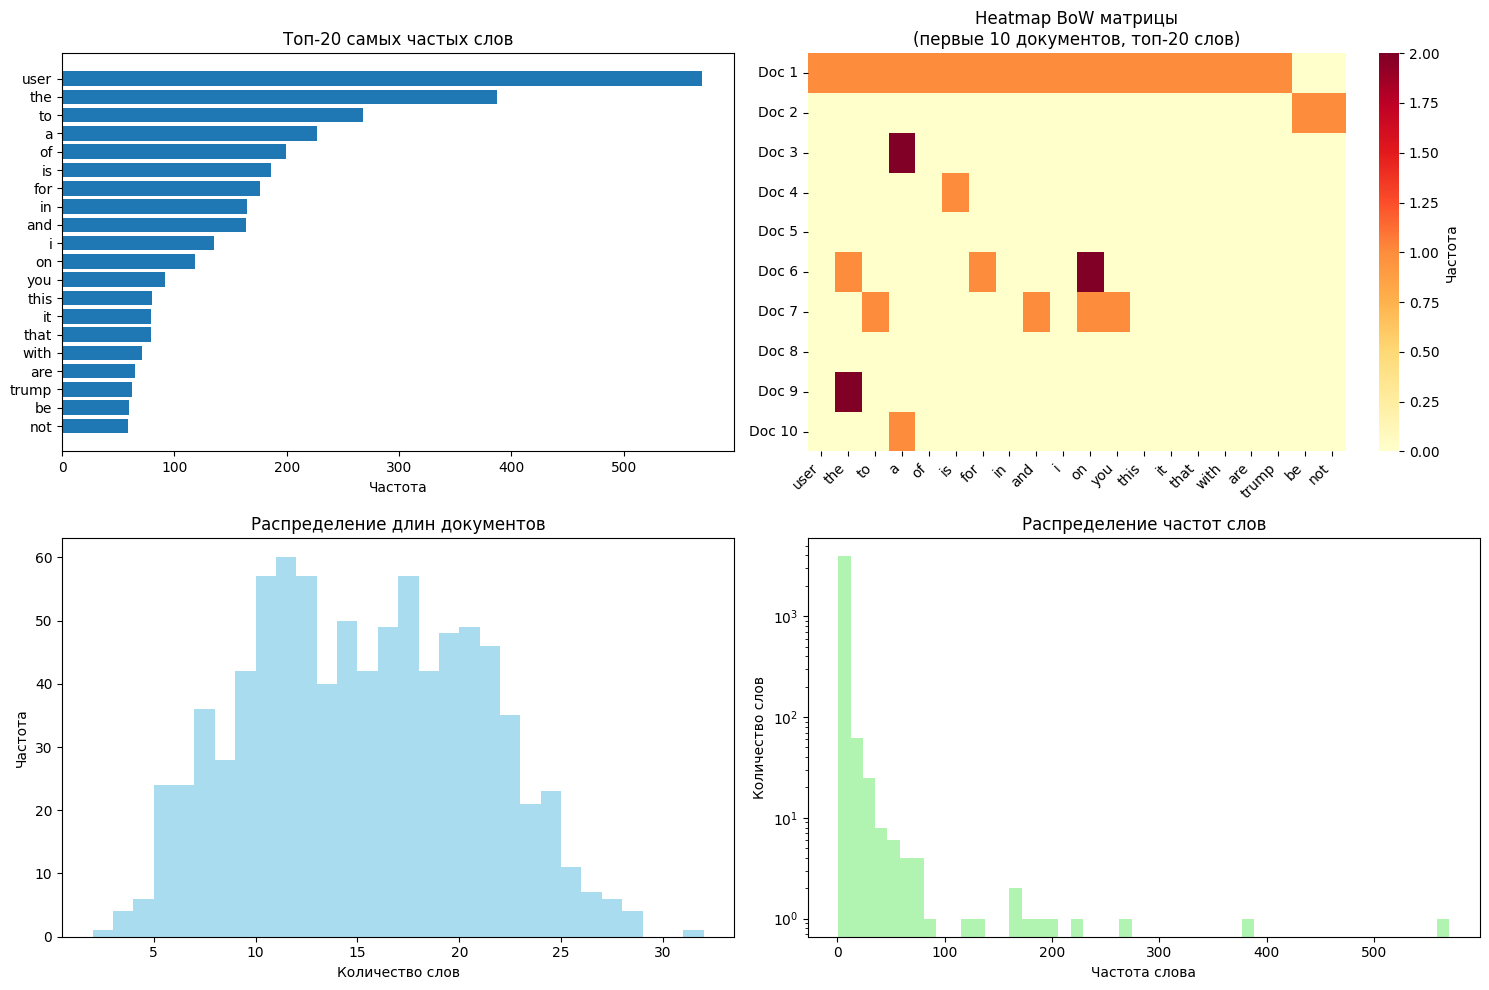

In [5]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Задача 1.1: Создайте словарь и BoW представление (макс. балл == 2)
# - Приведите тексты к нижнему регистру
# - Удалите знаки препинания
# - Постройте словарь
# - Преобразуйте документы в BoW векторы

def preprocess_text(text):
    """
    Предобработка текста: приведение к нижнему регистру и удаление знаков препинания
    """
    # Приводим к нижнему регистру
    text = text.lower()
    # Удаляем знаки препинания, оставляем только буквы и пробелы
    text = re.sub(r'[^\w\s]', '', text)
    # Удаляем лишние пробелы
    text = ' '.join(text.split())
    return text

# Предобработка всех текстов
print("Предобработка текстов...")
processed_texts = [preprocess_text(text) for text in texts]
# Построение словаря
print("Построение словаря...")
all_words = []
for text in processed_texts:
    words = text.split()
    all_words.extend(words)

# Создаем словарь (уникальные слова)
word_freq = Counter(all_words)
vocabulary = list(word_freq.keys())

print(f"✓ Размер словаря: {len(vocabulary)} уникальных слов")
print(f"✓ Общее количество слов: {len(all_words)}")

# Создаем BoW векторы
def text_to_bow(text, vocab):
    """Преобразует текст в BoW вектор"""
    words = text.split()
    bow_vector = [words.count(word) for word in vocab]
    return bow_vector

print("Создание BoW представления...")
bow_vectors = [text_to_bow(text, vocabulary) for text in processed_texts]

print(f"✓ Создано {len(bow_vectors)} BoW векторов")
print(f"✓ Размерность каждого вектора: {len(bow_vectors[0])}")

# Задача 1.2: Визуализируйте результаты (макс. балл == 1)
# - Создайте таблицу частот слов
# - Постройте heatmap матрицы BoW
# - Найдите самые частые слова в корпусе

# Таблица частот слов
print("\nТоп-20 самых частых слов:")
top_words = word_freq.most_common(20)
for i, (word, freq) in enumerate(top_words, 1):
    print(f"{i:2d}. {word:15s} - {freq:4d} раз")

#  Визуализация топ слов
plt.figure(figsize=(15, 10))

# График топ-20 слов
plt.subplot(2, 2, 1)
words, counts = zip(*top_words)
plt.barh(words, counts)
plt.title('Топ-20 самых частых слов')
plt.xlabel('Частота')
plt.gca().invert_yaxis()

# Heatmap для первых 10 документов и 20 слов
plt.subplot(2, 2, 2)
# Берем первые 10 документов и топ-20 слов для визуализации
heatmap_data = np.array(bow_vectors[:10])[:, :20]
sns.heatmap(heatmap_data,
            xticklabels=words[:20],
            yticklabels=[f'Doc {i+1}' for i in range(10)],
            cmap='YlOrRd',
            cbar_kws={'label': 'Частота'})
plt.title('Heatmap BoW матрицы\n(первые 10 документов, топ-20 слов)')
plt.xticks(rotation=45, ha='right')

# Распределение длин документов
plt.subplot(2, 2, 3)
doc_lengths = [len(text.split()) for text in processed_texts]
plt.hist(doc_lengths, bins=30, alpha=0.7, color='skyblue')
plt.title('Распределение длин документов')
plt.xlabel('Количество слов')
plt.ylabel('Частота')

# Распределение частот слов
plt.subplot(2, 2, 4)
word_frequencies = list(word_freq.values())
plt.hist(word_frequencies, bins=50, alpha=0.7, color='lightgreen')
plt.title('Распределение частот слов')
plt.xlabel('Частота слова')
plt.ylabel('Количество слов')
plt.yscale('log')

plt.tight_layout()
plt.show()

5. Построить TF-IDF (макс. балл == 5)

Создан словарь из 4028 слов
Создан BoW корпус из 870 документов
TF-IDF матрица создана: (870, 4028)
Компоненты TF-IDF успешно вычислены
TF матрица: (870, 4028)
DF вектор: (4028,)
IDF вектор: (4028,)
Будем анализировать 10 слов: ['good', 'bad', 'not', 'movie', 'film', 'like', 'love', 'great', 'time', 'story']
Собрано 178 записей для анализа
Данные успешно сохранены в tfidf_analysis.csv

Первые 10 записей из файла:
1. Слово: 'good', Документ: 12, TF: 1, DF: 22, IDF: 4.633, TF-IDF: 4.633
2. Слово: 'good', Документ: 30, TF: 1, DF: 22, IDF: 4.633, TF-IDF: 4.633
3. Слово: 'good', Документ: 54, TF: 1, DF: 22, IDF: 4.633, TF-IDF: 4.633
4. Слово: 'good', Документ: 153, TF: 1, DF: 22, IDF: 4.633, TF-IDF: 4.633
5. Слово: 'good', Документ: 208, TF: 1, DF: 22, IDF: 4.633, TF-IDF: 4.633
6. Слово: 'good', Документ: 212, TF: 1, DF: 22, IDF: 4.633, TF-IDF: 4.633
7. Слово: 'good', Документ: 291, TF: 2, DF: 22, IDF: 4.633, TF-IDF: 9.266
8. Слово: 'good', Документ: 305, TF: 1, DF: 22, IDF: 4.633, TF-IDF: 

/tmp/ipython-input-4100064986.py:172: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tfidf_values_list, labels=words_list)


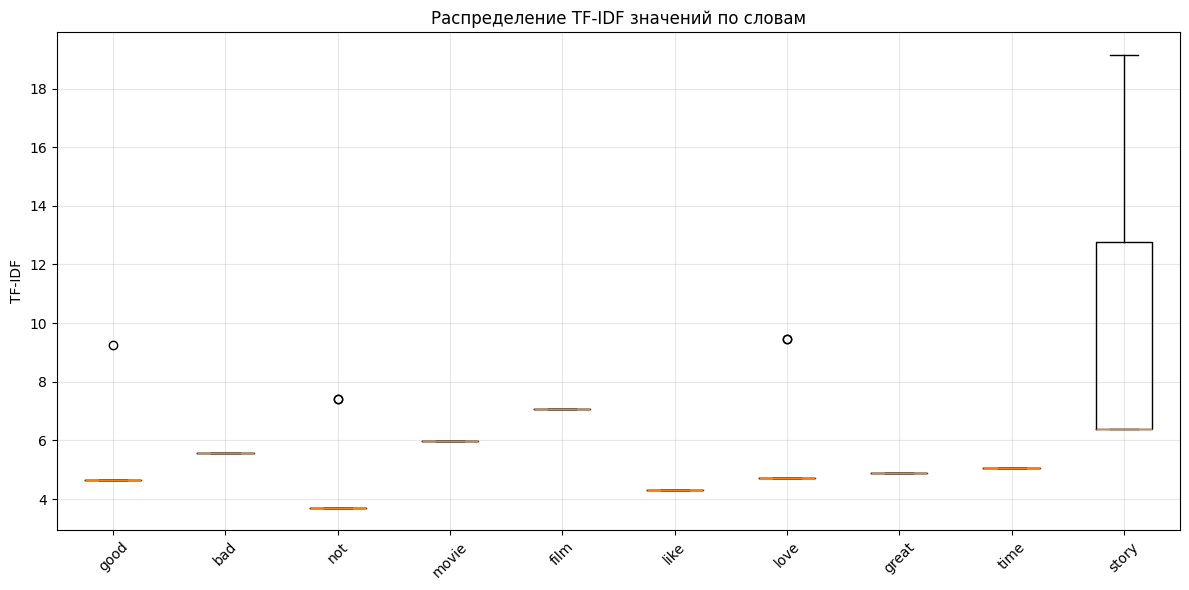

In [29]:
# Задача 2.1: Примените TF-IDF к BoW представлению (макс. балл == 2)
# - Используйте TfidfModel из gensim
# - Получите TF-IDF векторы для каждого документа

import pandas as pd
import numpy as np
from gensim import corpora
from gensim.models import TfidfModel
import re
import csv

# Загрузка данных
df = pd.read_csv('test.csv')
texts = df['text'].values

# Предобработка текстов
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

processed_texts = [preprocess_text(text) for text in texts]

# Токенизация
tokenized_texts = [text.split() for text in processed_texts]

# Создание словаря и BoW корпуса
dictionary = corpora.Dictionary(tokenized_texts)
bow_corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

print(f"Создан словарь из {len(dictionary)} слов")
print(f"Создан BoW корпус из {len(bow_corpus)} документов")

# Применение TF-IDF
tfidf_model = TfidfModel(bow_corpus)
tfidf_corpus = tfidf_model[bow_corpus]

def tfidf_to_dense(tfidf_corpus, dictionary):
    dense = []
    for doc in tfidf_corpus:
        vec = [0.0] * len(dictionary)
        for idx, score in doc:
            vec[idx] = score
        dense.append(vec)
    return dense

tfidf_dense = tfidf_to_dense(tfidf_corpus, dictionary)
tfidf_matrix = np.array(tfidf_dense)

print(f"TF-IDF матрица создана: {tfidf_matrix.shape}")

# Задача 2.2: Проанализируйте веса TF-IDF (макс. балл == 3)
# - Для каждого слова вычислите: (макс. балл == 2)
#   * TF (term frequency) в каждом документе
#   * DF (document frequency) во всем корпусе
#   * IDF (inverse document frequency)
#   * значение TF-IDF
# - Сохраните результат в *.сsv (макс. балл == 1)
# - Прикрепите *.csv в ваш репозиторий

def analyze_tfidf_components(bow_corpus, dictionary):
    # Создаем матрицу TF (term frequency)
    tf_matrix = np.zeros((len(bow_corpus), len(dictionary)))
    for doc_idx, doc in enumerate(bow_corpus):
        for word_idx, freq in doc:
            tf_matrix[doc_idx, word_idx] = freq

    # Вычисляем DF (document frequency)
    df_vector = np.sum(tf_matrix > 0, axis=0)

    # Вычисляем IDF (inverse document frequency)
    N = len(bow_corpus)
    idf_vector = np.log(N / (df_vector + 1)) + 1  # +1 для сглаживания

    # Вычисляем TF-IDF вручную
    tfidf_manual = tf_matrix * idf_vector

    return tf_matrix, df_vector, idf_vector, tfidf_manual

# Анализируем компоненты TF-IDF
tf_matrix, df_vector, idf_vector, tfidf_manual = analyze_tfidf_components(bow_corpus, dictionary)

print("Компоненты TF-IDF успешно вычислены")
print(f"TF матрица: {tf_matrix.shape}")
print(f"DF вектор: {df_vector.shape}")
print(f"IDF вектор: {idf_vector.shape}")

# Выбираем слова для анализа
words_to_analyze = ['good', 'bad', 'not', 'movie', 'film', 'like', 'love', 'great', 'time', 'story']

# Фильтруем только те слова, которые есть в словаре
words = [w for w in words_to_analyze if w in dictionary.token2id]
print(f"Будем анализировать {len(words)} слов: {words}")

# Собираем данные для CSV
rows = []

for word in words:
    word_id = dictionary.token2id[word]

    for doc_idx in range(len(bow_corpus)):
        tf = tf_matrix[doc_idx, word_id]  # term frequency в документе

        # Пропускаем документы, где слова нет
        if tf == 0:
            continue

        df = int(df_vector[word_id])      # document frequency
        idf = round(idf_vector[word_id], 4)
        tfidf_val = round(tfidf_manual[doc_idx, word_id], 4)

        rows.append({
            'word': word,
            'document': doc_idx + 1,
            'TF': int(tf),
            'DF': df,
            'IDF': idf,
            'TF-IDF': tfidf_val
        })

print(f"Собрано {len(rows)} записей для анализа")

# Сохраняем в CSV файл
with open('tfidf_analysis.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['word', 'document', 'TF', 'DF', 'IDF', 'TF-IDF'])
    for row in rows:
        writer.writerow([row['word'], row['document'], row['TF'], row['DF'], row['IDF'], row['TF-IDF']])

print("Данные успешно сохранены в tfidf_analysis.csv")

# Показываем примеры сохраненных данных
print("\nПервые 10 записей из файла:")
for i, row in enumerate(rows[:10]):
    print(f"{i+1}. Слово: '{row['word']}', Документ: {row['document']}, TF: {row['TF']}, DF: {row['DF']}, IDF: {row['IDF']}, TF-IDF: {row['TF-IDF']}")

# Дополнительная информация для понимания результатов
print("\n=== СТАТИСТИКА АНАЛИЗА ===")
print(f"Всего документов в корпусе: {len(bow_corpus)}")
print(f"Всего слов в словаре: {len(dictionary)}")
print(f"Всего записей в анализе: {len(rows)}")
print(f"Проанализировано слов: {len(words)}")

# Показываем статистику по IDF
print(f"\nIDF статистика:")
print(f"Минимальный IDF: {idf_vector.min():.4f}")
print(f"Максимальный IDF: {idf_vector.max():.4f}")
print(f"Средний IDF: {idf_vector.mean():.4f}")

# Показываем пример TF-IDF вектора для первого документа
print(f"\nПример TF-IDF вектора для документа 1 (первые 10 значений):")
print([f"{x:.4f}" for x in tfidf_matrix[0][:10]])

# Визуализация некоторых результатов
import matplotlib.pyplot as plt

# Создаем график распределения TF-IDF значений для анализируемых слов
plt.figure(figsize=(12, 6))

# Собираем TF-IDF значения для каждого слова
word_tfidf_values = {}
for row in rows:
    word = row['word']
    if word not in word_tfidf_values:
        word_tfidf_values[word] = []
    word_tfidf_values[word].append(row['TF-IDF'])

# Создаем boxplot
words_list = list(word_tfidf_values.keys())
tfidf_values_list = [word_tfidf_values[word] for word in words_list]

plt.boxplot(tfidf_values_list, labels=words_list)
plt.title('Распределение TF-IDF значений по словам')
plt.ylabel('TF-IDF')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()




##### **Как вычислить компоненты вручную**

```python
def analyze_tfidf_components(bow_corpus, dictionary):
    # Шаг 1: Создаем матрицу TF (term frequency)
    tf_matrix = np.zeros((len(bow_corpus), len(dictionary)))
    for doc_idx, doc in enumerate(bow_corpus):
        for word_idx, freq in doc:
            tf_matrix[doc_idx, word_idx] = freq
    
    # Шаг 2: Вычисляем DF (document frequency)
    df_vector = np.sum(tf_matrix > 0, axis=0)  # Количество документов с каждым словом
    
    # Шаг 3: Вычисляем IDF (inverse document frequency)
    N = len(bow_corpus)  # общее количество документов
    idf_vector = np.log(N / (df_vector + 1)) + 1
    
    # Шаг 4: Вычисляем TF-IDF вручную
    tfidf_manual = tf_matrix * idf_vector
    
    return tf_matrix, df_vector, idf_vector, tfidf_manual
```

6. Произвести сравните

*Эта часть не оценивается, но будет давать доп. баллы на экзамене для тех, кто выполнит её*

In [ ]:
# Сравните BoW и TF-IDF для конкретных слов
# - Выберите 3-4 слова из датасета (выберите слова, характерные для датасета)
# - Постройте графики сравнения их весов в BoW и TF-IDF

##### **Как построить сравнительный график**
```python
def compare_bow_tfidf(words, bow_dense, tfidf_dense, dictionary):
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    for i, word in enumerate(words):
        row, col = i // 2, i % 2
        word_id = dictionary.token2id[word]
        
        # Веса для этого слова во всех документах
        bow_weights = [doc[word_id] for doc in bow_dense]
        tfidf_weights = [doc[word_id] for doc in tfidf_dense]
        
        x = range(len(bow_dense))
        axes[row, col].bar(x, bow_weights, alpha=0.7, label='BoW', width=0.4)
        axes[row, col].bar([p + 0.4 for p in x], tfidf_weights, alpha=0.7, label='TF-IDF', width=0.4)
        axes[row, col].set_title(f'Сравнение весов: "{word}"')
        axes[row, col].legend()
        axes[row, col].set_xticks([p + 0.2 for p in x])
        axes[row, col].set_xticklabels([f'Док {i+1}' for i in x])
    
    plt.tight_layout()
    plt.show()
```